***

## Thompson Sampling

***

### Data Preprocessing

#### Importing  Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("C:/Users/HP Elitebook/OneDrive/Bureau/HOMEWORKS/PYTHON/ML_BOOTCAMP/Machine Learning A-Z (Codes and Datasets)/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Python/Ads_CTR_Optimisation.csv")
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing Thompson Sampling

In [3]:
import random 
N = 500
d = 10
ads_selected = []
numbers_of_rewards1 = [0]*d
numbers_of_rewards0 = [0]*d
total_rewards = 0
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate((numbers_of_rewards1[i] + 1), (numbers_of_rewards0[i] + 1))
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards1[ad] = numbers_of_rewards1[ad] + 1
    else:
        numbers_of_rewards0[ad] = numbers_of_rewards0[ad] + 1
    total_rewards = total_rewards + reward

### Visualization

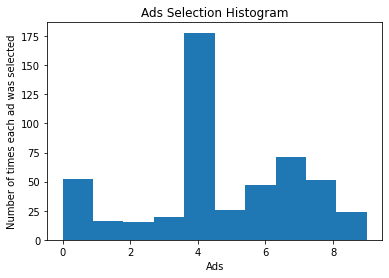

In [4]:
plt.hist(ads_selected)
plt.title('Ads Selection Histogram')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()